<sub>Mario Stanke, University of Greifswald, Germany</sub>
# Exercise Set 2 - Exercise 1 - Regression Network
<sup>(Monday morning)</sup>

This notebook gives the first example of a simple neural network.

### Generate an artificial dataset

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense

tf.keras.backend.set_floatx('float64') # floating point precision 64 bits
%matplotlib notebook

In [2]:
def f(x):
    '''A simple one-dimensional function with a few extrema'''
    return np.sin(5 * x) + 3 * x -  x**2

#### Simulate $(x, y)$ pairs as artificial data set

In [3]:
np.random.seed(1)
m = 100 # number of data points (examples)
x = np.linspace(0, 3, m) # equidistant in [0,3] (both boundaries included)
y_theoretical = f(x)      # the points on the curve 
y = y_theoretical + 0.1 * np.random.randn(m) # observations have noise (normal with mean 0 and variance 0.01)

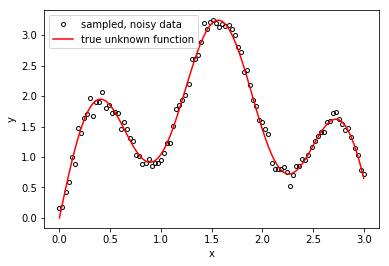

In [4]:
def plot_curve():
    fig, ax = plt.subplots()
    ax.plot(x, y, 'ko', fillstyle = 'none', markersize = 4, label = "sampled, noisy data") # ko: blac(k) circle
    ax.plot(x, y_theoretical, 'r', label = "true unknown function")
    plt.xlabel("x")
    plt.ylabel("y")
    return ax

ax = plot_curve()
ax.legend();

## Create Neural Network Model  
We will use ```tf.keras```, the high-level approach to neural network design and learning. 

In [5]:
np.random.seed(2) # so we all get the same pseudorandom results

# a neural network is a stack of layers, in keras called "Sequential" model
model = tf.keras.models.Sequential() # so far the stack is empty, 0 layers

# add neural network layers one by one
# Dense is a fully connected layer, parametrized by a matrix of shape (input_units, output_units).
# The first number given in Dense is the number of output units, the number of input units is implicit.
# By default use_bias=True which adds output_units parameters for each layer
model.add(Dense(8, activation = tf.nn.sigmoid, input_dim = 1)) # input dimension only required for first layer
model.add(Dense(8, activation = tf.nn.sigmoid))
model.add(Dense(1))

model.summary()     # summarizes layers and parameters
model.get_weights() # a look under the 'hood' for teaching purposes

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 16        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


[array([[-0.6369639 , -0.08553013, -0.00194741,  0.09234517, -0.77339114,
         -0.08523969, -0.69458058,  0.67688273]]),
 array([0., 0., 0., 0., 0., 0., 0., 0.]),
 array([[-0.49761963, -0.51537828,  0.05580027,  0.0123621 , -0.3980478 ,
         -0.19764623, -0.06706333,  0.3240853 ],
        [-0.12425333,  0.3591058 , -0.55588762, -0.12664584, -0.25395738,
         -0.0857926 ,  0.3801713 ,  0.50789995],
        [ 0.09032267, -0.1313592 , -0.24075799,  0.15233213, -0.03983391,
         -0.03827859,  0.30783473, -0.36592256],
        [ 0.47901029,  0.01733489, -0.48941981,  0.16825597,  0.02290638,
          0.23846867, -0.52363662, -0.45814762],
        [ 0.36507306, -0.00841091, -0.55638328, -0.02092003, -0.11828509,
         -0.54443551, -0.01151533,  0.43912887],
        [-0.55975878,  0.04506551, -0.17532385,  0.43369421,  0.29012769,
          0.32984171, -0.3751077 , -0.01870766],
        [-0.44555272, -0.54584578,  0.18967702, -0.5056785 ,  0.24459389,
          0.24160927,

The weights are randomly initializated. This is important (why?) as can be the parameters of the distribution. We postpone the details to the next notebook.

### Compile the model

In [6]:
# define the loss, optimization algorithm and prepare the model for gradient computation 
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.05),
              loss = 'mse') # mean squared error

### Train the parameters (learning)

In [7]:
# execute the actual training 
history = model.fit(x, y, epochs=3000, verbose=0) # takes ~20s
# verbose = 1,2 gives more output

### Examine the learning progress

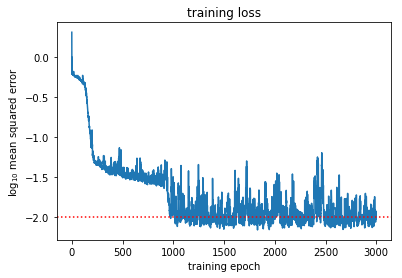

In [8]:
plt.plot(np.log10(history.history["loss"])); # one mse value per epoch
plt.title("training loss")
plt.xlabel("training epoch")
plt.ylabel(r"$\log_{10}$ mean squared error");
plt.axhline(y = -2, color = "red", linestyle = ":");

Observe that with our choice for the measurement noise the theoretical optimum for the mean squared error *on new data* is $10^{-2}$ (red dotted line).
### Use the model for predictions

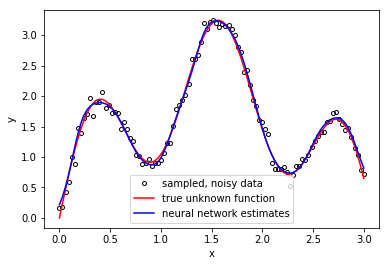

In [9]:
x_input = x.reshape((-1, 1)) # make x a matrix (with 1 column) as expected by predict
y_pred = model.predict(x_input)

ax = plot_curve()
ax.plot(x, y_pred, 'b', label="neural network estimates") # (b)lue
ax.legend();